# Assignment 4

In [23]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as sm
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dfUniform = pd.read_csv("uniformData.csv")
kData = dfUniform[(dfUniform["n"] == 100000) & (dfUniform["dimension"] == 2)]
nData = dfUniform[(dfUniform["k"] == 16) & (dfUniform["dimension"] == 2)]
dimData = dfUniform[(dfUniform["n"] == 100000) & (dfUniform["k"] == 16)]

# Analysis
### 1. Plot parts of your data to make sense of it(what impact to K, N, D, and the data structure have?)

### Varience in K:

Text(0.5, 1.0, 'Comparison: k')

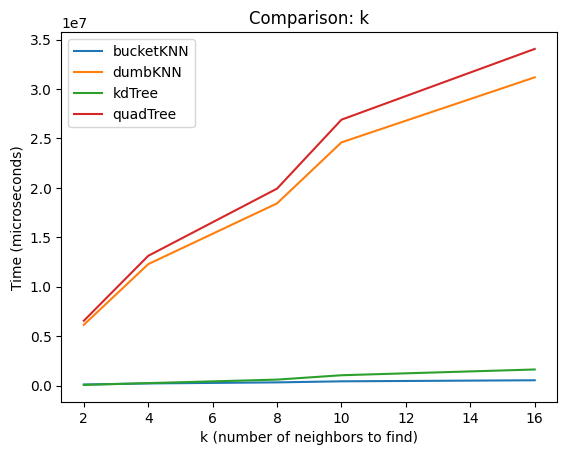

In [17]:
kData.set_index("k").groupby("structureName")["time"].plot(legend=True)

plt.xlabel('k (number of neighbors to find)')
plt.ylabel('Time (microseconds)')
plt.title('Comparison: k')

Both dumbKNN and quadTree exhibit a linear increase in time as the number of neighbors (k) increases. This is expected because both structures require more computations as k increases.For dumbKNN, every additional neighbor involves checking more points, which leads to a directly proportional increase in time. QUad tree shows a similar trend because it requires more traversal to find additional neighbors.

BucketKNN shows a minimal increase in time with an increase in k. This suggests that its performance is relatively stable regardless of the number of neighbors being queried. The bucket-based approach likely allows it to efficiently retrieve multiple neighbors without a significant increase in computational complexity.

KdTree also shows minimal sensitivity to the increase in k. This indicates that kdTree is efficient at finding multiple neighbors due to its hierarchical structure, which reduces the search space effectively.

### Varience in N

Text(0.5, 1.0, 'Comparison: n')

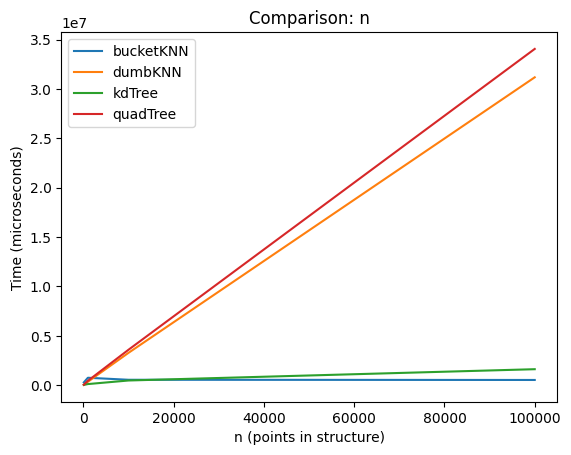

In [14]:
nData.set_index("n").groupby("structureName")["time"].plot(legend=True)

plt.xlabel('n (points in structure)')
plt.ylabel('Time (microseconds)')
plt.title('Comparison: n')

Query time of quad tree increases linearly with n, which is expected as the lograthmatic height of the tree would result in time complecity of O(NLogN), and is similar enough to O(N). 

Dumb knn also increase linearly with n, as dumbknn is expected to have a time complecity of O(N).

KD tree remains relatively constant as n increases, indicating that kdtrees performance stays well as the number of data points increases according to its logarithmic complexity.

Bucket knn also stays constant as n increases, showing that the algorithm of partioning data points into buckets works good.

### Varience in dimension

Text(0.5, 1.0, 'Comparison: d')

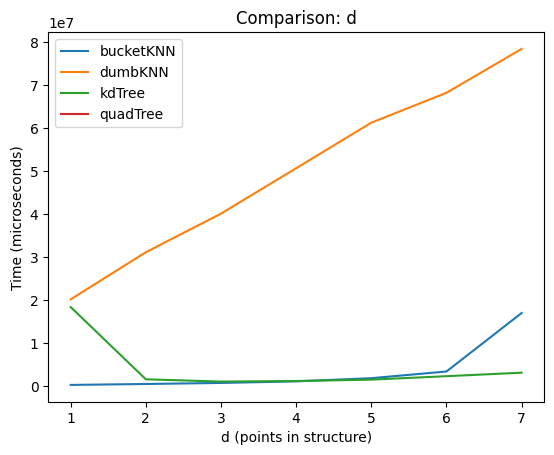

In [15]:
dimData.set_index("dimension").groupby("structureName")["time"].plot(legend=True)

plt.xlabel('d (points in structure)')
plt.ylabel('Time (microseconds)')
plt.title('Comparison: d')

The time taken for dumbKNN is linearly increasing with d. This is because the time complexity of dumbKNN is O(N*d). As dimensionality increases, the time taken by dumbKNN grows significantly.

bucketKNN shows relatively low and consistent time across different dimensions. This suggests that the algorithm is not significantly affected by the increase in dimensionality. This could be due to its approach of dividing the space into buckets, making the search more efficient and less sensitive to dimensionality.

kdTree performs well up to a certain dimensionality, maintaining low time, but begins to show a slight increase as the dimensionality grows. This is expected because kd-trees are known to work well in low to moderate dimensions, but their performance degrades as the dimensionality increases.

### 2. Perform regression based on the performance we expect to see. Do tests confirm or disprove our expectations? What running times do you expect to see based on simple big-O analysis?

### Varience in k:

In [34]:
kDataResult = sm.ols(formula="time ~ k + structureName", data=kData).fit()
kDataResult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     20.10
Date:                Tue, 06 Aug 2024   Prob (F-statistic):           6.90e-06
Time:                        09:20:22   Log-Likelihood:                -335.01
No. Observations:                  20   AIC:                             680.0
Df Residuals:                      15   BIC:                             685.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  -7.42e+06   3.04e+06     -2.444      0.027   -1.39e+07   -9.48e+05
structureName[T.dumbKNN]   1.821e+07   3.33e+06      5.474      0.000    1.11e+07    2.53e+07
structureName[T.kdTree]    3.947e+05   3.33e+06      0.119      0.907   -6.69e+06    7.48e+06
structureName[T.quadTree]  1.979e+07   3.33e+06      5.950      0.000    1.27e+07    2.69e+07
k                          9.676e+05    2.4e+05      4.031      0.001    4.56e+05    1.48e+06
==============================================================================
Omnibus:                        2.830   Durbin-Watson:                   0.479
Prob(Omnibus):                  0.243   Jarque-Bera (JB):                1.436
Skew:                          -0.319   Prob(JB):                        0.488
Kurtosis:                       1.853   Cond. No.                         41.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Varience in n:

In [12]:
nDataResult = sm.ols(formula="time ~ n + structureName", data=nData).fit()
nDataResult.summary()

/Users/tailangcao/myGithubRepo/CS6017/HW4/spatialDatastructuresStarterCode/myenv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=16 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     4.140
Date:                Mon, 05 Aug 2024   Prob (F-statistic):             0.0275
Time:                        22:14:24   Log-Likelihood:                -274.12
No. Observations:                  16   AIC:                             558.2
Df Residuals:                      11   BIC:                             562.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                 -4.089e+06   4.24e+06     -0.964      0.356   -1.34e+07    5.24e+06
structureName[T.dumbKNN]   8.182e+06   5.69e+06      1.438      0.178   -4.35e+06    2.07e+07
structureName[T.kdTree]      3.1e+04   5.69e+06      0.005      0.996   -1.25e+07    1.26e+07
structureName[T.quadTree]  9.004e+06   5.69e+06      1.582      0.142   -3.52e+06    2.15e+07
n                           166.4386     48.052      3.464      0.005      60.677     272.200
==============================================================================
Omnibus:                        0.048   Durbin-Watson:                   1.391
Prob(Omnibus):                  0.976   Jarque-Bera (JB):                0.277
Skew:                           0.004   Prob(JB):                        0.871
Kurtosis:                       2.355   Cond. No.                     2.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Varience in dimension:

In [19]:
dimDataResult = sm.ols(formula="time ~ dimension + structureName", data=dimData).fit()
dimDataResult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     22.35
Date:                Tue, 06 Aug 2024   Prob (F-statistic):           1.38e-06
Time:                        02:06:27   Log-Likelihood:                -385.36
No. Observations:                  22   AIC:                             780.7
Df Residuals:                      17   BIC:                             786.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                 -9.896e+06   6.43e+06     -1.538      0.142   -2.35e+07    3.68e+06
structureName[T.dumbKNN]   4.645e+07   5.96e+06      7.798      0.000    3.39e+07     5.9e+07
structureName[T.kdTree]    6.134e+05   5.96e+06      0.103      0.919    -1.2e+07    1.32e+07
structureName[T.quadTree]  3.721e+07   1.22e+07      3.060      0.007    1.16e+07    6.29e+07
dimension                  3.372e+06   1.22e+06      2.773      0.013    8.07e+05    5.94e+06
==============================================================================
Omnibus:                        2.367   Durbin-Watson:                   0.751
Prob(Omnibus):                  0.306   Jarque-Bera (JB):                1.095
Skew:                           0.511   Prob(JB):                        0.578
Kurtosis:                       3.387   Cond. No.                         24.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

According to the regression result, varience in k has the highest r-square value of 0,843, followed by varience in dimension with r-square value of 0.840 and varience in n with 0.601. This suggests that k has the most substantial impact on the performance (time) of the data structures, followed by N and then the dimension. 

The dumbKNN structure consistently has the highest coefficients, indicating it contributes the most to the running time. The quadTree structure also shows high coefficients but is lower than dumbKNN. The kdTree structure shows minimal impact on running time across all models.

